<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/kmean_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KMeans Project-Mall Customer

### K-means is a popular clustering algorithm used in machine learning and data analysis. Its main goal is to partition a dataset into distinct groups or clusters based on the similarity of data points.

Here's a simple and brief overview of how the K-means algorithm works:


1-Initialization: Choose the number of clusters (K) you want to identify in your dataset. Randomly initialize K cluster centroids, which are points in the feature space.

2-Assignment: Assign each data point to the cluster whose centroid is closest to it. The distance measure commonly used is Euclidean distance.

3-Update Centroids: Recalculate the centroids of each cluster by taking the mean of all data points assigned to that cluster.

4-Repeat: Repeat steps 2 and 3 until convergence. Convergence occurs when the assignments of data points to clusters no longer change significantly or when a predetermined number of iterations is reached.

5-Result: The final cluster assignments and centroids represent the identified clusters in the dataset.


## About Dataset:
/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv

This file contains the basic information (ID, age, gender, income, spending score) about the customers

1-CustomerID
Unique ID assigned to the customer

2-Gender
Gender of the customer

3-Age
Age of the customer

4-Annual Income (k$)
Annual Income of the customee

5-Spending Score (1-100)
Score assigned by the mall based on customer behavior and spending nature


## Import libraries

In [117]:
import pandas as pd
import numpy as np
from numpy import unique
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Get Dataset

In [118]:
df = pd.read_csv('Mall_Customers.csv')

## EDA

In [119]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [120]:
df.shape

(200, 5)

In [121]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [122]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [124]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Clean Data

In [125]:
df = df.drop('CustomerID',axis =1)

## Visualization

### Distribution Plot

<Figure size 1000x800 with 0 Axes>

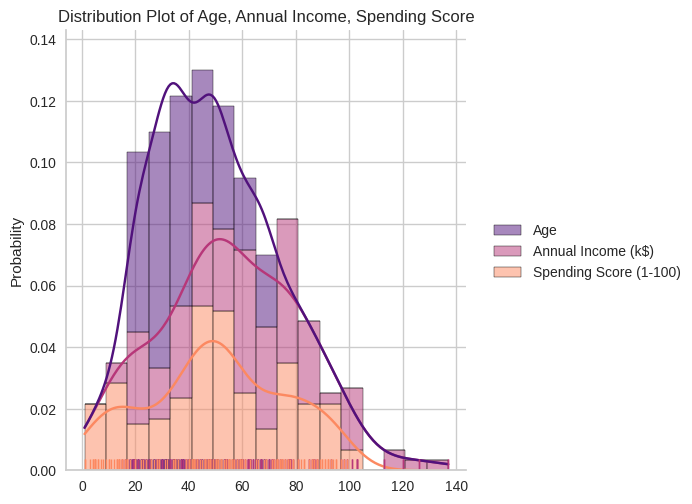

In [126]:
plt.figure(figsize=(10,8))
sns.displot(data=df[['Age','Annual Income (k$)','Spending Score (1-100)']],multiple='stack',kde=True,palette='magma',rug=True,stat='probability')
plt.title('Distribution Plot of Age, Annual Income, Spending Score')
plt.show()


## Count Plot

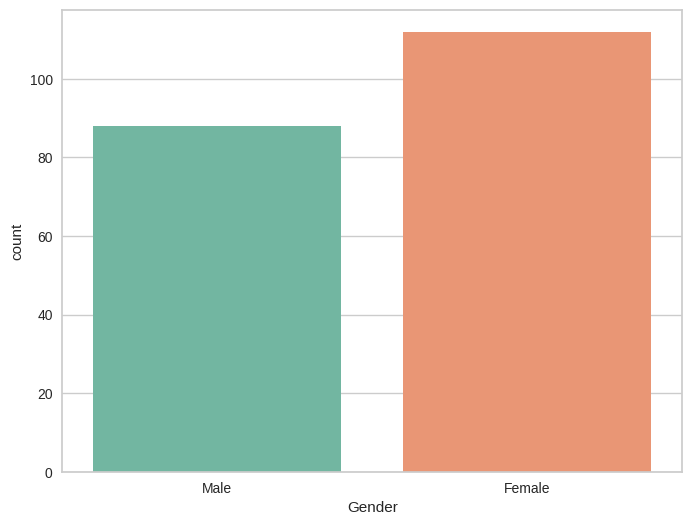

In [127]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Gender',palette='Set2')
plt.show()

## Pair Plot

<Figure size 1600x800 with 0 Axes>

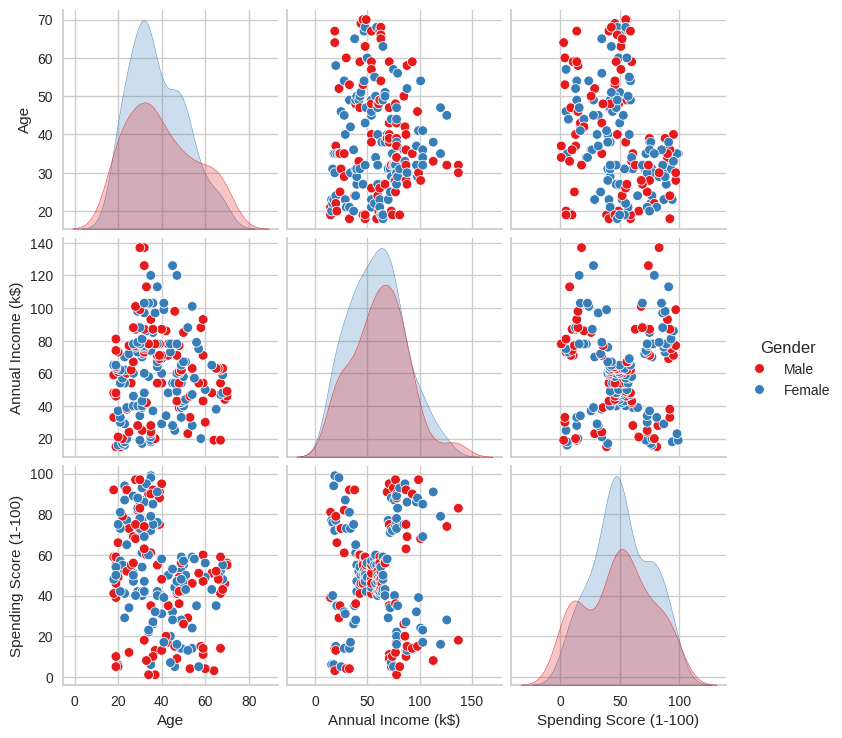

In [128]:
plt.figure(figsize=(16,8))
sns.pairplot(data=df,hue='Gender',palette='Set1')
plt.show();

## Heat Map

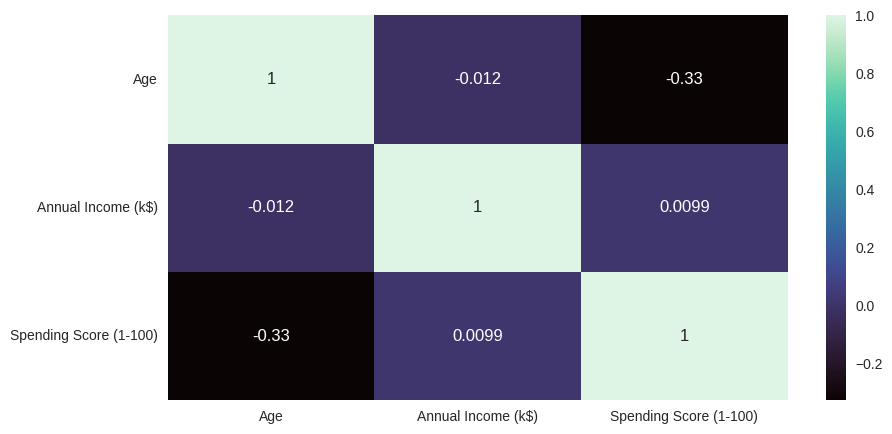

In [129]:
plt.figure(figsize=(10, 5))
corr = df.corr()
sns.heatmap(data=corr, annot=True, cmap = 'mako')
plt.show()

## Build KMeans Model

### Elbow method for Selecting the best k value

In [130]:
df=df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [131]:
from sklearn.cluster import KMeans

In [132]:
from yellowbrick.cluster import KElbowVisualizer

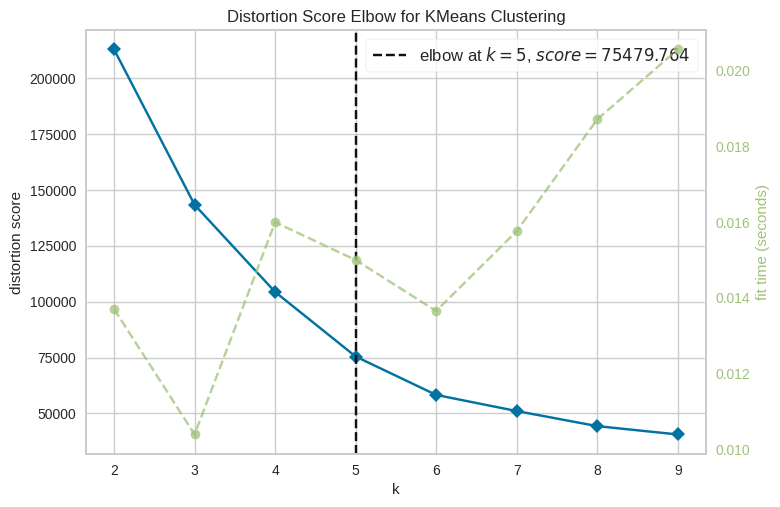

In [133]:
vis = KElbowVisualizer(KMeans(),k=(2,10))
vis.fit(df)
vis.poof()
plt.show()

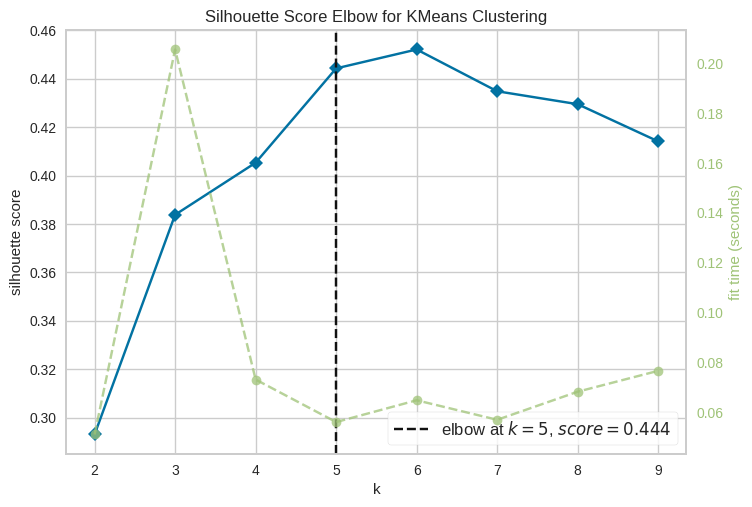

In [141]:
vis = KElbowVisualizer(KMeans(random_state=42),k=(2,10),metric='silhouette')
vis.fit(df)
vis.show()
plt.show()

## The best k value is 5

## The Average Sillhouette for k=5

In [142]:
from yellowbrick.cluster import SilhouetteVisualizer

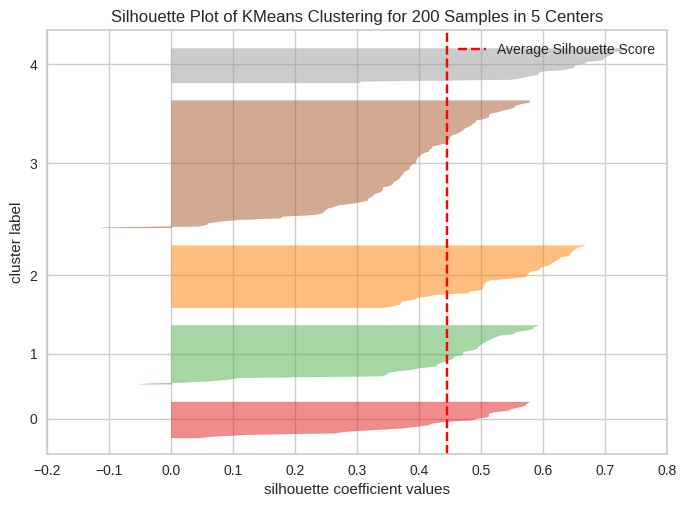

In [144]:
sil_vis = SilhouetteVisualizer(KMeans(5))
sil_vis.fit(df)
sil_vis.show()
plt.show()

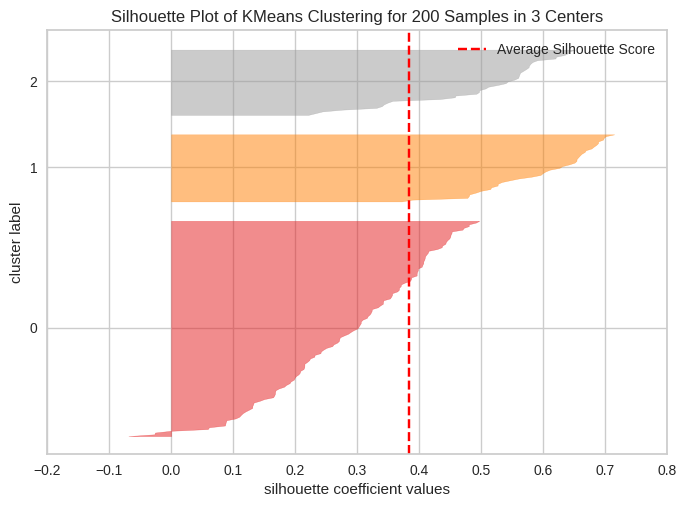

In [145]:
sil_vis = SilhouetteVisualizer(KMeans(3))
sil_vis.fit(df)
sil_vis.show()
plt.show()

## Train the KMeans Model by k =5

In [148]:
km = KMeans(init="k-means++",n_clusters= 5)
km.fit(df)

KMeans(n_clusters=5)

In [149]:
df['KM_Cluster']=km.labels_
KM_centres=km.cluster_centers_

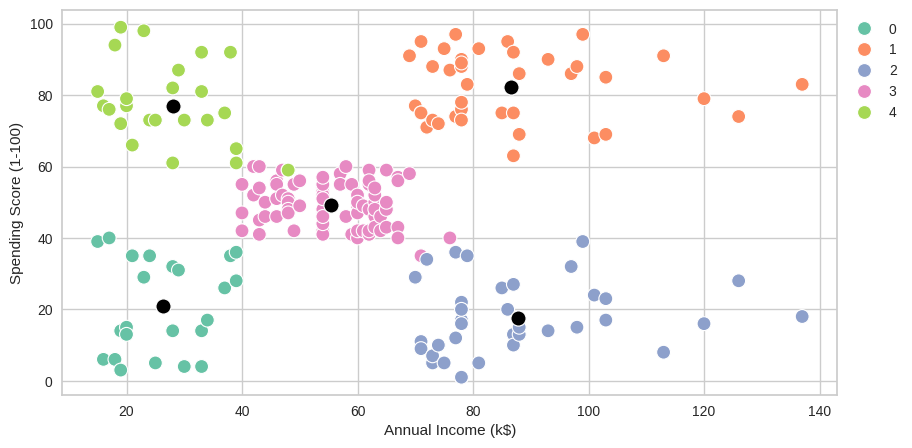

In [155]:
plt.figure(figsize=(10,5))
ax=sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='KM_Cluster',palette='Set2',s = 100)
ax=sns.scatterplot(x=KM_centres[:,1],y=KM_centres[:,2],s=120,color='black')
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

## Conclusion:

## The KMeans clustering algorithm provides five distinct clusters for segmentation, and gives good insights into the underlying patterns within the customer base. These clusters represent groups of customers who share similar characteristics in terms of annual income and spending score behavior.
## By categorizing customers into these segments, we can tailor marketing strategies, product offerings, and customer engagement initiatives to better meet the specific needs and preferences of each cluster. This segmentation approach allows for a more targeted and personalized approach to customer interactions, potentially improving customer satisfaction and optimizing business outcomes.